Jeon, Yoontae and Kan, Raymond and Li, Gang, Stock Return Autocorrelations and Expected Option Returns (March 31, 2019)

In [91]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
spx_tk = yf.Ticker('^GSPC')
spx_df = spx_tk.history(start='2020-1-1',  end='2024-10-31', interval='1d')[['Open','High', 'Low','Close', 'Volume']]
spx_df.index = spx_df.index.date
spx_df['log_ret'] = np.log(spx_df.Close) - np.log(spx_df.Close.shift(1))
spx_df['ret'] = spx_df.Close / spx_df.Close.shift(1) - 1

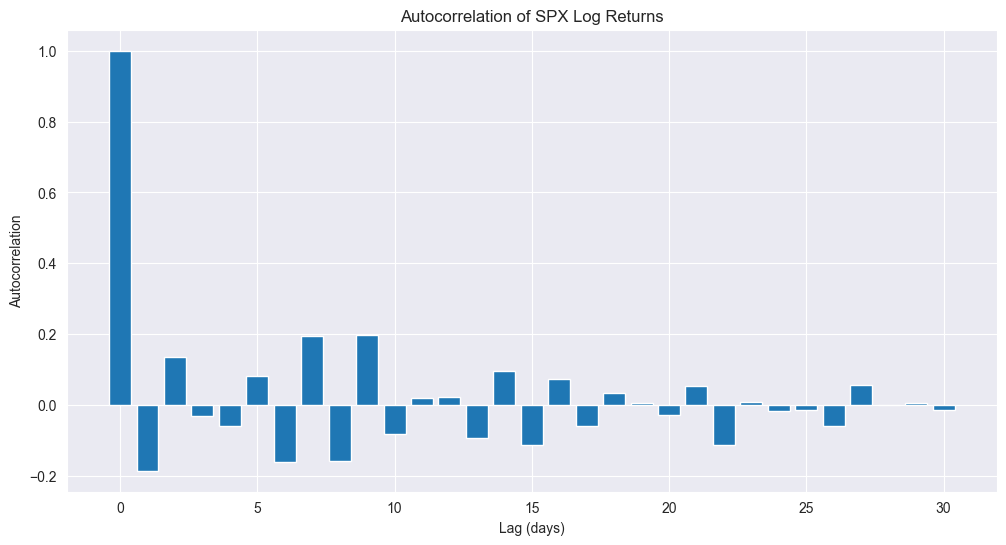

In [93]:
lags = range(0, 31)
autocorr_values = [spx_df['log_ret'].autocorr(i) for i in lags]

plt.figure(figsize=(12, 6))
plt.bar(lags, autocorr_values)
plt.title('Autocorrelation of SPX Log Returns')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation');

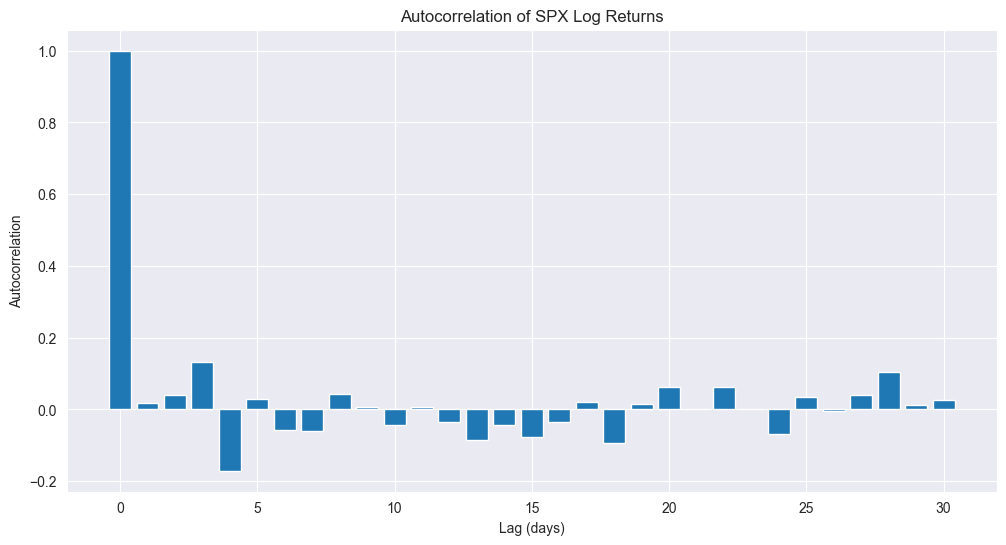

In [94]:
spx_tk = yf.Ticker('GME')
spx_df = spx_tk.history(start='2020-1-1',  end='2024-10-31', interval='1d')[['Open','High', 'Low','Close', 'Volume']]
spx_df.index = spx_df.index.date
spx_df['log_ret'] = np.log(spx_df.Close) - np.log(spx_df.Close.shift(1))
spx_df['ret'] = spx_df.Close / spx_df.Close.shift(1) - 1

lags = range(0, 31)
autocorr_values = [spx_df['log_ret'].autocorr(i) for i in lags]

plt.figure(figsize=(12, 6))
plt.bar(lags, autocorr_values)
plt.title('Autocorrelation of SPX Log Returns')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation');

In [95]:
def rolling_autocorr(ticker, window=250, start_date='2020-1-1',  end_date='2024-10-31'):
    tick = yf.Ticker(ticker)
    price_df = tick.history(start=start_date,  end=end_date, interval='1d')[['Open','High', 'Low','Close', 'Volume']]
    price_df.index = price_df.index.date
    price_df['log_ret'] = np.log(price_df.Close) - np.log(price_df.Close.shift(1))
    price_df['ret'] = price_df.Close / price_df.Close.shift(1) - 1
    price_df['autocorr'] = price_df['ret'].rolling(window).apply(lambda x: x.autocorr(lag=1), raw=False)
    
    return price_df

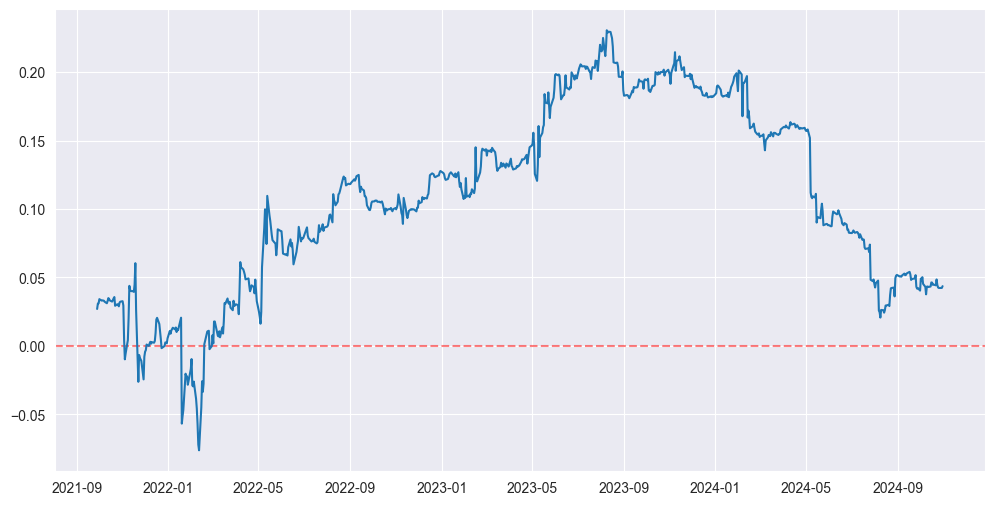

In [96]:
autocorr_df = rolling_autocorr('PLTR')

plt.figure(figsize=(12, 6))
plt.axhline(y=0, c='r',ls='--', alpha=0.5)
plt.plot(autocorr_df['autocorr']);